········

Result from the remote Quantum Inspire backend:

State	Counts
0 0 0	11
0 0 1	3
0 1 0	12
0 1 1	7
1 0 0	7
1 0 1	9
1 1 0	967
1 1 1	8

Result from the local Qiskit simulator backend:

{'1 1 0': 957, '0 1 1': 13, '1 0 1': 9, '1 0 0': 8, '1 1 1': 6, '0 0 0': 13, '0 1 0': 9, '0 0 1': 9}


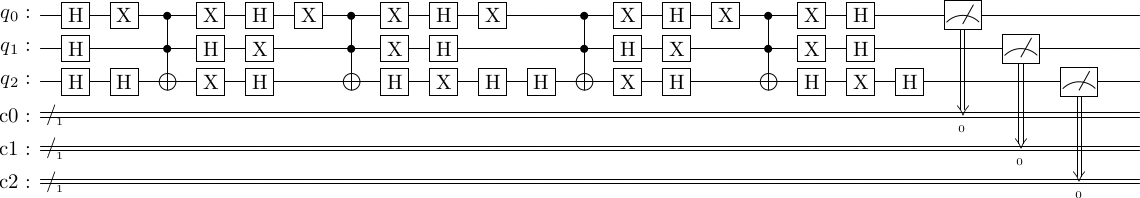

In [13]:
import os
import math 

from getpass import getpass
from coreapi.auth import TokenAuthentication
from qiskit import BasicAer, execute
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit
from comparator import comparator
from quantuminspire.credentials import get_authentication
from quantuminspire.qiskit import QI


QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')
authentication = TokenAuthentication('40a1a77810b8d0e10428efa64ae124e79f2b6336', scheme='token')
QI.set_authentication(authentication, QI_URL)
qi_backend = QI.get_backend('QX single-node simulator')


q = QuantumRegister(7, "q")
c = ClassicalRegister(1, "c")
qc = QuantumCircuit(q, c, name="conditional")

qc.x([0,1,5])
qc=qc.compose(comparator(3),range(7))

qc.measure(q[6], c)

qi_job = execute(qc, backend=qi_backend, shots=128)
qi_result = qi_job.result()
histogram = qi_result.get_counts(qc)
print("\nResult from the remote Quantum Inspire backend:\n")
print('State\tCounts')
[print('{0}\t{1}'.format(state, counts)) for state, counts in histogram.items()]

print("\nResult from the local Qiskit simulator backend:\n")
backend = BasicAer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots=128)
result = job.result()
print(result.get_counts(qc))
qc.draw(output="latex")